## Import necessary modules

In [1]:
import Utils.p_values
from WholeBrain.Observables.swfcd import swFCD
from WholeBrain.Observables.metastability import Metastability
from WholeBrain.Observables.event_based_intrinsic_ignition import EventBasedIntrinsicIgnition
# from WholeBrain.Observables.phase_based_intrinsic_ignition import PhaseBasedIntrinsicIgnition
from Filters.bold_band_pass_filter import BOLDBandPassFilter
# import matplotlib.pyplot as plt
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2
from subjects import *

## Setup parameters

In [2]:
data_root_path = "data/TVB_brain_tumor/"
data_subjects_path = data_root_path + "derivatives/TVB/"

## Load subjects

In [3]:
subjects = Subjects()
subjects.initialize(data_subjects_path)

print("************************* Subjects Info *************************")
subjects.pretty_print()
print("*****************************************************************")

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)   
CON01           2100.0          none                           0.0            
CON02           2100.0          none                           0.0            
CON03           2100.0          none                           0.0            
CON04           2100.0          none                           0.0            
CON05           2400.0          none                           0.0            
CON06           2400.0          none                           0.0            
CON07           2400.0          none                           0.0            
CON08           2400.0          none                           0.0            
CON09           2400.0          none                           0.0            
CON10           2400.0          none                           0.0            
CON11           2400.0          none                           0.

## Compute swFCD
&#x2BC1; **TODO: Filter parameters?????**

In [4]:
def compute_preop_swFCD_dk68():
    preop_ts_dk68 = subjects.filter_preop_ts_dk68()
    result = dict()
    swFCD_operator = swFCD()

    for sub_id, ts_dk68 in preop_ts_dk68.items():
        tr = subjects.get_subject_by_id(sub_id).get_fmri_tr()/1000.0
        ms_dk68 = swFCD_operator.from_fMRI(
            ts_dk68,
            # TODO: Filter parameters???
            BOLD_filter=BOLDBandPassFilter(tr=tr, flp=0.02, fhi=0.1, k=2, remove_strong_artifacts=3.0)
        )
        result[sub_id] = ms_dk68
    return result

preop_swFCD_dk68 = compute_preop_swFCD_dk68()

## TODO: Do things with swFCD

In [5]:
# TODO: Super useful computations and plotting with swFCD here!

## Compute metastability

In [6]:
def compute_preop_metastability_dk68():
    preop_ts_dk68 = subjects.filter_preop_ts_dk68()
    result = dict()
    ms_operator = Metastability()

    for sub_id, ts_dk68 in preop_ts_dk68.items():
        tr = subjects.get_subject_by_id(sub_id).get_fmri_tr()/1000.0
        ms_dk68 = ms_operator.from_fMRI(
            ts_dk68,
            BOLD_filter=BOLDBandPassFilter(tr=tr, flp=0.007, fhi=0.07, k=2, remove_strong_artifacts=3.0)
        )
        result[sub_id] = ms_dk68
    return result

preop_metastability_dk68 = compute_preop_metastability_dk68()

## Plot metastability Box

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. >= 15cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.155e-02 U_stat=9.600e+01


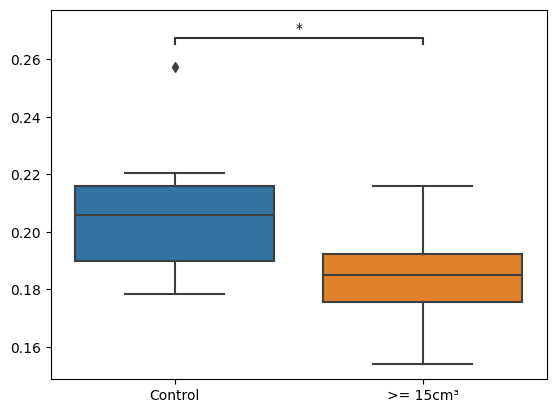

In [7]:
def plot_metastability_box(subjects_ms):
    # fig, ax = plt.subplots()

    s_none = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() == 'none')
    s_tumor = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none')
    s_meningioma = subjects.filter_subjects(lambda sub: 'Meningioma' in sub.get_tumor_type_and_grade())
    s_glioma = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none' and 'Meningioma' not in sub.get_tumor_type_and_grade())
    s_plus_10_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 10.0)
    s_plus_15_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 15.0)
    s_plus_20_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 20.0)
    s_plus_30_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 30.0)

    data_none = {k: v.metastability for k, v in subjects_ms.items() if k in s_none.data}
    data_tumor = {k: v.metastability for k, v in subjects_ms.items() if k in s_tumor.data}
    data_meningioma = {k: v.metastability for k, v in subjects_ms.items() if k in s_meningioma.data}
    data_glioma = {k: v.metastability for k, v in subjects_ms.items() if k in s_glioma.data}
    data_plus_10_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_10_cm3.data}
    data_plus_15_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_15_cm3.data}
    data_plus_20_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_20_cm3.data}
    data_plus_30_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_30_cm3.data}

    # Convert data to nparray
    split_data = {
        'Control':  np.array(list(data_none.values())),
        # 'Tumor': np.array(list(data_tumor.values())),
        # 'Meningioma': np.array(list(data_meningioma.values())),
        # 'Glioma': np.array(list(data_glioma.values())),
        # '>= 10cm³': np.array(list(data_plus_10_cm3.values())),
        '>= 15cm³': np.array(list(data_plus_15_cm3.values())),
        # '>= 20cm³': np.array(list(data_plus_20_cm3.values())),
        # '>= 30cm³': np.array(list(data_plus_30_cm3.values()))
    }
    # plt.boxplot(split_data.values(), labels=split_data.keys())
    # plt.show()
    plotComparisonAcrossLabels2(split_data)

plot_metastability_box(preop_metastability_dk68)

## Compute Event Based Intrinsic Ignition
&#x2BC1; **NOTE: If tr length is 8 for the 2100ms subjects and 7 for the 2400ms subjects, then the window is the same amount of time for both.**

In [8]:
def compute_preop_event_based_intrinsic_ignition():
    preop_ts_dk68 = subjects.filter_preop_ts_dk68()
    result = dict()

    for sub_id, ts_dk68 in preop_ts_dk68.items():

        tr_ms = subjects.get_subject_by_id(sub_id).get_fmri_tr()

        # If we use length 8 for the 2100ms TR scans and length 7 for the 2400ms scans, then we have the same windows time frame
        # for each subject (16800ms)
        ignition_tr_length = None
        if np.isclose(tr_ms, 2400.0):
            ignition_tr_length = 7
        elif np.isclose(tr_ms, 2100.0):
            ignition_tr_length = 8
        assert ignition_tr_length is not None, "Ups... TR length not 2100 or 2400..."

        ebig_operator = EventBasedIntrinsicIgnition(ignition_tr_length=ignition_tr_length)

        ebig_dk68 = ebig_operator.from_fMRI(
            ts_dk68,
            # flp=0.01, fhi=0.1
            #   Tagliazucchi, Enzo, Pablo Balenzuela, Daniel Fraiman, and Dante R. Chialvo.
            #       “Criticality in Large-Scale Brain FMRI Dynamics Unveiled by a Novel
            #       Point Process Analysis.” Frontiers in Physiology 3 (2012). https://doi.org/10.3389/fphys.2012.00015.
            #
            # flp=0.04, fhi=0.07. NOTE: This paper uses phased based intrinsic ignition.
            #   Glerean, Enrico, Juha Salmi, Juha M. Lahnakoski, Iiro P. Jääskeläinen, and Mikko Sams.
            #       “Functional Magnetic Resonance Imaging Phase Synchronization as a Measure of Dynamic Functional Connectivity.”
            #       Brain Connectivity 2, no. 2 (April 2012): 91–101. https://doi.org/10.1089/brain.2011.0068.
            BOLD_filter=BOLDBandPassFilter(tr=tr_ms/1000.0, flp=0.04, fhi=0.07, k=2, remove_strong_artifacts=3.0)
        )
        result[sub_id] = ebig_dk68

    return result

preop_ebii_dk68 = compute_preop_event_based_intrinsic_ignition()

## Plot Event Based Intrinsict Ignition (mignition)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.808e-02 U_stat=9.700e+01
Glioma vs. >= 10cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.159e-01 U_stat=9.000e+01
Control vs. >= 10cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.240e-02 U_stat=1.270e+02


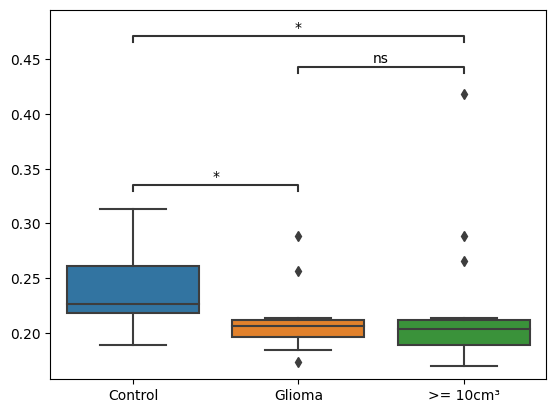

In [9]:
def plot_ebii_box(subjects_ebii):
    # fig, ax = plt.subplots()

    s_none = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() == 'none')
    s_tumor = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none')
    s_meningioma = subjects.filter_subjects(lambda sub: 'Meningioma' in sub.get_tumor_type_and_grade())
    s_glioma = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none' and 'Meningioma' not in sub.get_tumor_type_and_grade())
    s_plus_10_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 10.0)
    s_plus_15_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 15.0)
    s_plus_20_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 20.0)
    s_plus_30_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 30.0)

    data_none = {k: v.mignition for k, v in subjects_ebii.items() if k in s_none.data}
    data_tumor = {k: v.mignition for k, v in subjects_ebii.items() if k in s_tumor.data}
    data_meningioma = {k: v.mignition for k, v in subjects_ebii.items() if k in s_meningioma.data}
    data_glioma = {k: v.mignition for k, v in subjects_ebii.items() if k in s_glioma.data}
    data_plus_10_cm3 = {k: v.mignition for k, v in subjects_ebii.items() if k in s_plus_10_cm3.data}
    data_plus_15_cm3 = {k: v.mignition for k, v in subjects_ebii.items() if k in s_plus_15_cm3.data}
    data_plus_20_cm3 = {k: v.mignition for k, v in subjects_ebii.items() if k in s_plus_20_cm3.data}
    data_plus_30_cm3 = {k: v.mignition for k, v in subjects_ebii.items() if k in s_plus_30_cm3.data}

    # Convert data to nparray
    split_data = {
        'Control':  np.array(list(data_none.values())),
        # 'Tumor': np.array(list(data_tumor.values())),
        # 'Meningioma': np.array(list(data_meningioma.values())),
        'Glioma': np.array(list(data_glioma.values())),
        '>= 10cm³': np.array(list(data_plus_10_cm3.values())),
        # '>= 15cm³': np.array(list(data_plus_15_cm3.values())),
        # '>= 20cm³': np.array(list(data_plus_20_cm3.values())),
        # '>= 30cm³': np.array(list(data_plus_30_cm3.values()))
    }
    # plt.boxplot(split_data.values(), labels=split_data.keys())
    # plt.show()
    plotComparisonAcrossLabels2(split_data)

plot_ebii_box(preop_ebii_dk68)